In [1]:
import pandas as pd
import seaborn as sns


In [2]:
train = pd.read_csv("../data/train/train.csv")
print(train.shape)
train.head()

(237609, 7)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [3]:
logs = pd.read_csv("../data/train/view_log.csv")
print(logs.shape)
logs.head()

(3118622, 5)


,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [4]:
items = pd.read_csv("../data/train/item_data.csv")
print(items.shape)
items.head()

(132761, 6)


,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [5]:
def unique(df):
    print("Number of rows in df: ",df.shape[0])
    for col in df.columns:
        print("Number of unique values in "+col+": ",len(df[col].unique()))
def missing(df):
    for col in df.columns:
        print("Number of missing values in "+col+": ",df[col].isnull().sum())
def values(df,cols):
    for col in cols:
        print("Value Counts for the column :",col)
        print(df[col].value_counts())

## 1. EDA
### 1.1 Exploring train.csv
#### 1.1.1 Unique values and variable types

In [6]:
unique(train)

Number of rows in df:  237609
Number of unique values in impression_id:  237609
Number of unique values in impression_time:  36461
Number of unique values in user_id:  74723
Number of unique values in app_code:  490
Number of unique values in os_version:  3
Number of unique values in is_4G:  2
Number of unique values in is_click:  2


#### 1.1.2 Missing values check

In [7]:
missing(train)

Number of missing values in impression_id:  0
Number of missing values in impression_time:  0
Number of missing values in user_id:  0
Number of missing values in app_code:  0
Number of missing values in os_version:  0
Number of missing values in is_4G:  0
Number of missing values in is_click:  0


1. Impression ID: Unique indentifier for each row
3. impression time: date_time variable
2. user_id: Identifier for each user
3. app_code: identifier for different websites/ applications. Should not be treated as a numerical value as it has no inherant numerical ranking (nominal variable)
4. os_version: Has inherant numerical ranking (ordinal variable)
5. is_4G : Binary variable (perform get_dummies)
6. is_click: Target Variable (binary) to denote whether or not the user clicked on the ad/

#### 1.1.3 Distribution of features and corresponding encoding scheme to be used

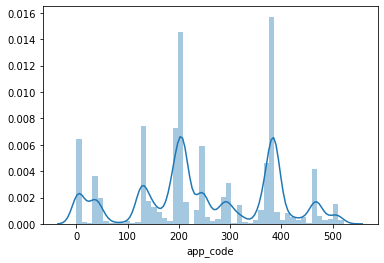

In [8]:
sns.distplot(train.app_code)

In [9]:
# sns.distplot(train.os_version)
print(train.os_version.value_counts())

latest          129216
intermediate     55543
old              52850
Name: os_version, dtype: int64


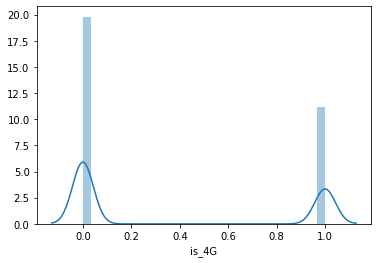

In [10]:
sns.distplot(train.is_4G)

0    226747
1     10862
Name: is_click, dtype: int64


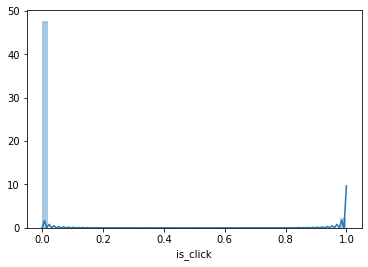

In [11]:
sns.distplot(train.is_click)
print(train.is_click.value_counts())

In [12]:
print("Ratio between cases where customer actually clicks on the ad against the cases where the ad is ignored",train.is_click.value_counts()[1]/train.is_click.value_counts()[0])

Ratio between cases where customer actually clicks on the ad against the cases where the ad is ignored 0.04790361063211421


1. Target Variable is Imbalanced
2. Need to find a proper encoding scheme for app code
3. is_4G can be simply encoded using get_dummies
4. os_version can be numerically encoded while preserving the ranks
5. User_ids can be clustered and a cluster_id can be used as a feature.

### 1.2  Exploring view_logs.csv
#### 1.2.1 Unique values and variable types

In [13]:
unique(logs)

Number of rows in df:  3118622
Number of unique values in server_time:  82840
Number of unique values in device_type:  3
Number of unique values in session_id:  1014970
Number of unique values in user_id:  89157
Number of unique values in item_id:  126708


#### Missing values check

In [14]:
missing(logs)

Number of missing values in server_time:  0
Number of missing values in device_type:  0
Number of missing values in session_id:  0
Number of missing values in user_id:  0
Number of missing values in item_id:  0


In [15]:
values(logs,["device_type"])

Value Counts for the column : device_type
android    3117737
iphone         861
web             24
Name: device_type, dtype: int64


In [17]:
logs.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


1. device_type -> get_dummies()

### 1.3 Exploring item_data.csv

In [18]:
items.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [19]:
unique(items)

Number of rows in df:  132761
Number of unique values in item_id:  132761
Number of unique values in item_price:  13531
Number of unique values in category_1:  17
Number of unique values in category_2:  79
Number of unique values in category_3:  335
Number of unique values in product_type:  7959


In [20]:
missing(items)

Number of missing values in item_id:  0
Number of missing values in item_price:  0
Number of missing values in category_1:  0
Number of missing values in category_2:  0
Number of missing values in category_3:  0
Number of missing values in product_type:  0


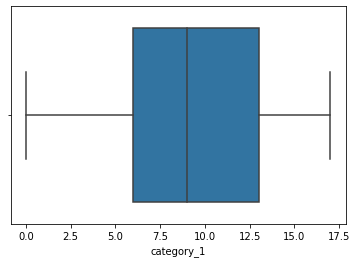

In [22]:
sns.boxplot(items.category_1)

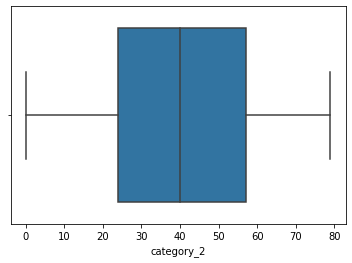

In [23]:
sns.boxplot(items.category_2)

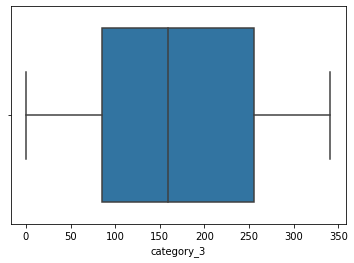

In [24]:
sns.boxplot(items.category_3)

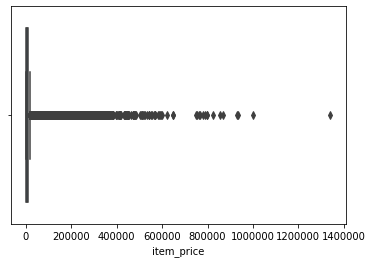

In [28]:
sns.boxplot(items.item_price)

In [31]:
print("minimum price",items.item_price.min())
print("maximum price",items.item_price.max())

minimum price 5
maximum price 1340800


1. The depth for all the three categories varies. These three features may need to be standardized. It will be trated as a numerical variable only
2. The prices for items start from as low as 5 and goes up till 1340800. most of the items belong to the lower priced brackets. 

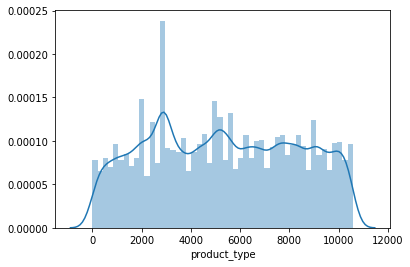

In [25]:
sns.distplot(items.product_type)

## 2. Performing joins

In [35]:
logs.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [38]:
items.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [51]:
logs_items = logs.join(items,on="item_id",how="left",lsuffix="",rsuffix="_l").drop(["item_id_l"],axis=1)
logs_items.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,6176.0,14.0,62.0,201.0,4077.0
1,2018-10-15 08:58:00,android,503590,74788,7640,128348.0,9.0,3.0,27.0,234.0
2,2018-10-15 08:58:00,android,573960,23628,128855,7616.0,1.0,28.0,336.0,6823.0
3,2018-10-15 08:58:00,android,121691,2430,12774,499.0,13.0,58.0,189.0,9839.0
4,2018-10-15 08:58:00,android,218564,19227,28296,633.0,11.0,51.0,329.0,3844.0


In [54]:
print(logs_items.shape)
missing(logs_items)

(3118622, 10)
Number of missing values in server_time:  0
Number of missing values in device_type:  0
Number of missing values in session_id:  0
Number of missing values in user_id:  0
Number of missing values in item_id:  0
Number of missing values in item_price:  4092
Number of missing values in category_1:  4092
Number of missing values in category_2:  4092
Number of missing values in category_3:  4092
Number of missing values in product_type:  4092


In [53]:
len(items.item_id.unique())-len(logs.item_id.unique())

6053

In [55]:
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


This means there are 4092 item_ids in view_logs.csv that have no corresponding id in item_data.csv

## 3. Feature Engineering

### 3.1 Ideas for new features
1. User_id decile based on item prices (Will categorize users based on amount of money spent by the user)
2. User_id decile based on no_of_clicks (Will categorize users based on number of times he/she clicks on the ad )

### 3.2 Encoding Schemes 
How to encode user_id, app_code